# 1. Data Preprocessing and Exploration


     Roll no test preparation   gender parental level of education  \
0  EXA000001              none    male                some college   
1  EXA000002              none    male             master's degree   
2  EXA000003              none    male             master's degree   
3  EXA000004              none  female                some college   
4  EXA000005              none  female                 high school   

          lunch    Section  practical score  viva score  exam score  
0      standard  Section A               70          73          70  
1  free/reduced  Section C               55          54          52  
2  free/reduced  Section E               56          46          43  
3  free/reduced  Section C               35          47          41  
4      standard  Section C               87          92          81  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  D

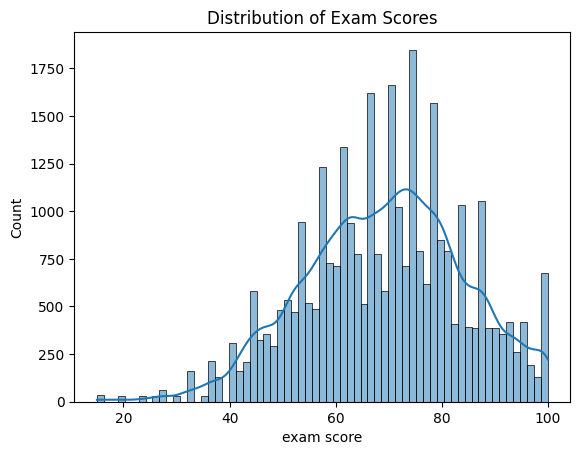

In [2]:
# Import neccessary Library files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_df = pd.read_csv("D:/Hackathon/train.csv")
test_df = pd.read_csv("D:/Hackathon/test.csv")

# Explore the data
print(train_df.head())
print(train_df.info())
print(train_df.describe())

# Visualize the distribution of exam scores
sns.histplot(train_df['exam score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()


# 2. Feature Engineering and Encoding

In [3]:
# Separate features and target variable
X = train_df.drop(['Roll no', 'exam score'], axis=1)
y = train_df['exam score']

# Identify categorical and numerical columns
categorical_cols = ['gender', 'Section', 'parental level of education', 'lunch', 'test preparation ']
numerical_cols = ['practical score', 'viva score']

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Train the model
model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['practical score',
                                                   'viva score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Section',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '])])),
                ('regressor', RandomForestRegressor(random_state=0))])

# 3. Model Evaluation and Prediction

In [4]:
# Predict on the training set
y_train_pred = model.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_train_pred)
r2 = r2_score(y, y_train_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict on the test set
X_test = test_df.drop(['Roll no'], axis=1)
test_pred = model.predict(X_test)

# Prepare the submission file
submission_df = pd.DataFrame({
    'Roll no': test_df['Roll no'],
    'exam score': test_pred
})
submission_df.to_csv('submission.csv', index=False)


Mean Squared Error: 38.83679500138062
R-squared: 0.8276159468865161


# 4. Hyperparameter Tuning

In [5]:
#using GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(-grid_search.best_score_))


Best parameters found:  {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Lowest RMSE found:  15.119114320852924
